# YOLO Tensor

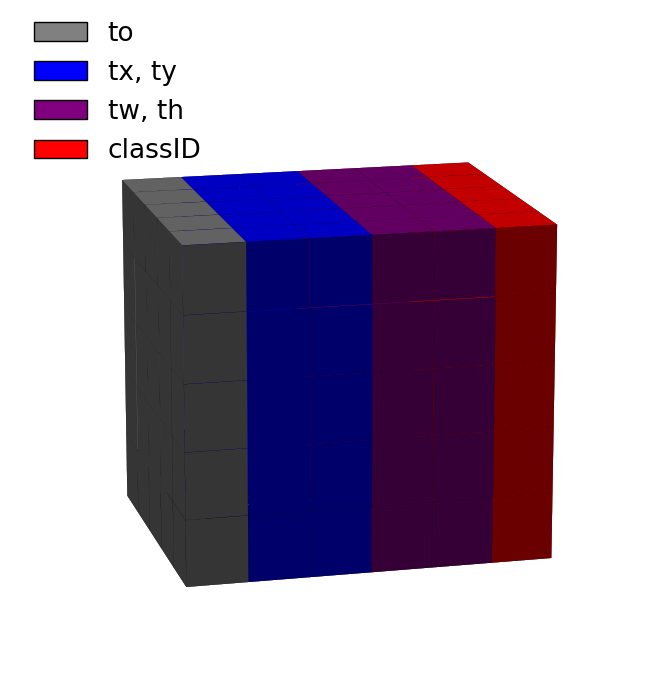

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Patch

def draw_tensor_rubiks_rotated(H=5, W=6, C=5,
    palette=("grey","blue","blue","purple","purple","red"),
    edge_lw=0.08):
    # reverse order
    palette = palette[::-1]

    # tensor occupancy (all voxels active)
    mask = np.ones((C, H, W), dtype=bool)
    cols = np.empty(mask.shape + (4,), dtype=float)
    for d, col in enumerate(palette):
        cols[:, :, d, :] = mcolors.to_rgba(col)

    # rotate +90° around x axis
    mask = np.swapaxes(mask, 0, 1)[::-1, :, :]
    cols = np.swapaxes(cols, 0, 1)[::-1, :, :, :]

    # mpl.voxels wants (W,H,D)
    mask_whd = mask.transpose(2, 1, 0)
    cols_whd = cols.transpose(2, 1, 0, 3)

    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(mask_whd, facecolors=cols_whd, edgecolor='k', linewidth=edge_lw)

    # hide axes
    ax.set_axis_off()
    ax.grid(False)
    for pane in [ax.xaxis, ax.yaxis, ax.zaxis]:
        pane.set_pane_color((1,1,1,0))

    ax.view_init(elev=15, azim=76)
    ax.set_box_aspect((W, H, C))

    # ---- Legend ----
    legend_colors = ["grey", "blue", "purple", "red"]
    legend_values = {"grey" : "to", "blue" : "tx, ty", "purple" : "tw, th", "red" :"classID"}
    patches = [Patch(facecolor=c, edgecolor='k', label=legend_values[c]) for c in legend_colors]
    ax.legend(
        handles=patches,
        loc="upper left",
        bbox_to_anchor=(0,1.1),
        frameon=False,
        prop={"size": 19}   # increase font size
    )

    plt.tight_layout()
    plt.show()

# Example
draw_tensor_rubiks_rotated()